<a href="https://colab.research.google.com/github/piyush4669/ML/blob/master/content_recomendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from matplotlib import pyplot as plt
from numpy import unique
import random
import nltk
from IPython.display import display, HTML

In [69]:
#Download natural language processing data
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [70]:
#import posts data
df = pd.read_csv("https://raw.githubusercontent.com/piyush4669/data/master/posts.csv").fillna("")
#import stop words for future words
stop_words = set(stopwords.words('english'))
#import stem words from nlp library for future use
stemmer = SnowballStemmer('english')

#parse dataframe for ease
post_ids = df["_id"]
post_titles = df["title"]
post_categorys = df["category"]
post_types = df["post_type"]

#delete dataframe from memory for ease
del df


clean_posts = []


#for each post title catagory and type 
for post_title, post_category, post_type in zip(post_titles, post_categorys, post_types):
    #clean up post title for punctuation and other characters and make it lowercase
    post_title = ''.join(i for i in post_title if str.isalnum(i) or i in string.whitespace).replace("  "," ").lower()
    #tokenize post title
    post_title = word_tokenize(post_title)
    #remove stop words from the post title
    post_title = [w for w in post_title if not w in stop_words]
    #convert each word with the root word by stemming
    post_title = [stemmer.stem(word) for word in post_title]
    #convert the post title back to sentence
    post_title = " ".join(post_title)
    #clean up post catagories for the same 
    post_category = post_category.replace("|", " ")
    post_category = ''.join(i for i in post_category if str.isalnum(
        i) or i in string.whitespace).replace("  ", " ").lower()
    post_category = word_tokenize(post_category)
    post_category = [w for w in post_category if not w in stop_words]
    post_category = [stemmer.stem(word) for word in post_category]
    post_category = " ".join(post_category)
    #make a sentense out of unique words from post title catagory and type
    clean_post = (post_category + " " + post_title +
                " " + post_type).replace("   ", " ")
    clean_posts.append(clean_post)

#delete unnecessary arrays to conserve memory
del post_titles, post_categorys, post_types

#print the clean post array dataset
print(*clean_posts,sep='\n')

plant biotechnolog hello blog
artifici intellig machin learn inform technolog ml ai blog
oper system oper system blog
draw lord shiva artwork
competit law competit law evolv blog
competit law raghavan committe 2002 blog
competit law let discuss case law blog
competit law form cartel blog
eco system biodivers blog
econom polici econom polici blog
graphic graphic design corpor design artwork
draw trident artwork
draw lord shiva artwork
paint smart citi artwork
pen ink om namah shivaay artwork
draw kid buu artwork
comput technolog inform technolog mis blog
draw paint portrait art artwork
competit law classifi form cartel blog
graphic design visual art illustr graphic best friend artwork
draw calligraphi calligraphi artwork
photographi colour pushkar artwork
empower marit rape rape rape blog
photographi spiritu artwork
 librari manag system softwar requir specif srs project
 navig system use bfs dfs algorithm project
draw shadow sketch artwork
video edit promot video skill
inorgan chemistr

The above approach is taken so that we can incorporate the unique features of posts. By this method the user will be recomended based on the post as well as its catagory so the most relevent posts are available to the user in the end.



In [0]:
#vectorize the text data with count vectorizer method so that it can be used for clustering model.
vectorizer = TfidfVectorizer()
#get training data from the text data.
X = vectorizer.fit_transform(clean_posts)
#convert sparse matrix to dense array so that the clustering algorithm can handle it
# X = X.toarray()

Above we are using TFIDF for text data vectrization cause it is more reliable and widely used for text vectorization. 

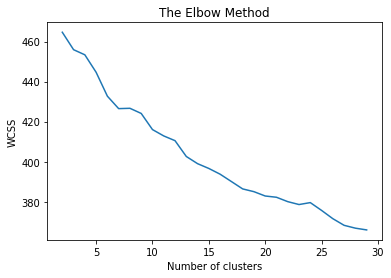

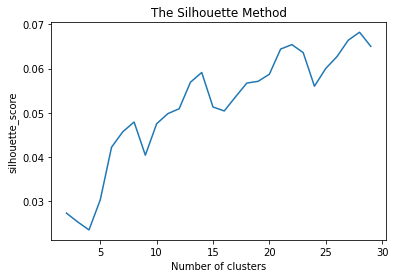

In [72]:
wcss = []
s = []

start_range = 2
end_range = 30

#training the kmeans clustering model from n=2 to n=30 centroids so that we can 
#figure out the optimal number of cluster for the given dataset

#here n_jobs with -1 will make use of all the available cores for parallelism
for i in range(start_range, end_range):
    kmeans = KMeans(n_clusters=i, init='k-means++',
                    max_iter=10, n_init=1, random_state=100,n_jobs=-1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    s.append(round(silhouette_score(X, kmeans.labels_), 4))

#After training print the elbow graph
plt.plot(range(start_range, end_range), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


plt.plot(range(start_range, end_range), s)
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()

**THE ELBOW METHOD**

The number of clusters that we choose for a given dataset cannot be random. Each cluster is formed by calculating and comparing the distances of data points within a cluster to its centroid. An ideal way to figure out the right number of clusters would be to calculate the Within-Cluster-Sum-of-Squares (WCSS). 
WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids.

We can find the optimum value for K using an Elbow point graph. We randomly initialise the K-Means algorithm for a range of K values and will plot it against the WCSS for each K value. Then figure out which elbow suits the dataset best.

**THE SILHOUETTE METHOD**

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

From the above graph results we can see that we get our best elbow at 20 clusters and similarly the Silhouette score is highest at 7 hence we can conclude that the most optimum number of clusters should be 20.

In [73]:
#calculate classes, centroids and distance of each post from its centroid
model = KMeans(n_clusters=100, init='k-means++', max_iter=1000, n_init=10, random_state=100,n_jobs=-1)
#train and get distance
Y = model.fit_transform(X)
#test the model on its own data to get the classes
W = model.fit(X).predict(X)
#calcuate mean distance of the post from the centroid
Y_mean = [np.mean(y) for y in Y]
#Zip results for better visualizations
result = zip(post_ids, Y_mean, W)
#sorting for better visualization
result = sorted(result, key=lambda x: x[2] + x[1])
#Print results 
print(*result,sep='\n')

('5ec7abfdec493f4a26558860', 1.241353589413201, 0)
('5ec7a8bdec493f4a26558846', 1.2430449598109052, 0)
('5ec7a699ec493f4a2655883a', 1.2496866158862638, 0)
('5ec7a7a3ec493f4a26558840', 1.2496866158862638, 0)
('5ec7ad1aec493f4a26558869', 1.252331463058736, 0)
('5ec7aafbec493f4a26558857', 1.253147951307277, 0)
('5ebc3239514aab59896bcc86', 1.2613487410697983, 0)
('5eb1373110426255a7aa9fc1', 1.2622386205168132, 0)
('5e41bd7deab55d319938a839', 1.2387793288430065, 1)
('5e3c7293eab55d319938a74d', 1.245826052426943, 1)
('5e3e9cc0eab55d319938a79b', 1.2497998756424058, 1)
('5e41b98eeab55d319938a82d', 1.2513161585939654, 1)
('5e04fb252a37d20505da2a2b', 1.2644947229817187, 1)
('5eb6dd5afd92f539c465dd7d', 1.242124981106925, 2)
('5ecdecc67023451e66223765', 1.2563570448758037, 2)
('5e9a8271a3258347b42f2c35', 1.2566486879766123, 2)
('5ea1ef0710426255a7aa9a7e', 1.2566486879766123, 2)
('5eb1551e10426255a7aaa003', 1.2451844392925282, 3)
('5eb153ca10426255a7aa9fff', 1.2476789427614434, 3)
('5eb159a61042625

In [74]:
#creating dataframe from previous result for further processing
res_df = pd.DataFrame(list(result), columns=['post_id', 'dist', 'post_class'])
#posts dataframe
post_df = pd.read_csv("https://raw.githubusercontent.com/piyush4669/data/master/posts.csv").fillna("")
#creating user-post views dataframe from file
views_df = pd.read_csv("https://raw.githubusercontent.com/piyush4669/data/master/views.csv")
#merging dataframes 
df = pd.merge(views_df, res_df, on='post_id')
#get unique users
users = df.user_id.unique().tolist()
#get all unique user data 
user_data = {}

for user in users:
    ndf = df.loc[df['user_id'] == user].values.tolist()
    user_data[user] = {}
    for row in ndf:
        # print(row[4])
        temp = str(row[4])
        if (temp in user_data[user]):
            user_data[user][temp].append(row[1])
        else:
            user_data[user][temp] = []
            user_data[user][temp].append(row[1])





#generate a random user
random_user = random.choice(users)

#get the users favourite topics
fav_class_list = list(user_data[random_user].keys())

#get user read posts
user_posts_ids = []
for fav_class in fav_class_list:
    user_posts_ids.extend(user_data[random_user][fav_class])

#get posts based on content
content_based_rec_ids = res_df.loc[res_df["post_class"].isin(
        fav_class_list)]["post_id"].values.tolist()

#get posts read by other users on the same topics
collaborative_rec_ids = df.loc[df["post_class"].isin(
    fav_class_list)]["post_id"].values.tolist()


user_posts = post_df.loc[post_df["_id"].isin(
    user_posts_ids)]

content_based_rec = post_df.loc[post_df["_id"].isin(
    content_based_rec_ids)]

collaborative_rec = post_df.loc[post_df["_id"].isin(
    collaborative_rec_ids)]

#Display result tables
print("USER LIKED POSTS")
display(HTML(user_posts.to_html()))
print("-"*150)
print("SIMILAR POSTS BASED ON USER READ POSTS")
display(HTML(content_based_rec.to_html()))
print("-"*150)
print("SIMILAR POSTS BASED ON OTHER USERS ON SAME TOPICS")
display(HTML(collaborative_rec.to_html()))

,_id,title,category,post_type
165,5e7a63c2cfc8b713f5ac7d86,Fight: Against Corona virus,Drawings,artwork
348,5ea3227010426255a7aa9ac1,Aesthetic.,Photography,artwork
349,5ea3236810426255a7aa9ac8,Solitude,Photography,artwork
365,5eabfaf510426255a7aa9da0,Eyes that speak. Photo by Dan Farrell,Photography,artwork
394,5eb1df6d10426255a7aaa029,Novel & Consenent (P.H.P),,project
395,5eb2c11210426255a7aaa052,Gangster Style,Drawings,artwork
409,5eba2dd3514aab59896bcc57,Blur but beautiful <3,Photography,artwork
410,5eba2e94514aab59896bcc5a,Sky never disappoints me!,Photography,artwork
411,5ebc3239514aab59896bcc86,The Basic Edge of Design.,Fashion Desigining|Fashion Illustration|Pattern Cutting|Fashion Communication,blog
415,5ec1fd0974f7660d73aa0fd5,Daaku,Drawings,artwork


----------------------------------------------------------------------------------------------------


,_id,title,category,post_type
10,5da745b6019399436815c4cd,Corporate design,Graphic|Graphic Design,artwork
11,5dada695610ba040fbfdf585,Trident,Drawings,artwork
13,5dada798610ba040fbfdf58b,Smart City,Painting,artwork
15,5dada89b610ba040fbfdf591,Kid Buu,Drawings,artwork
19,5dbc622a99cbb90e4339c7f6,Best friend,Graphic Design|Visual Arts|Illustration|Graphic,artwork
23,5dde6a91369b28584ecca156,Spirituality,Photography,artwork
25,5de179d80eb5e25a8a07f079,Navigation system using BFS DFS algorithms,,project
29,5dee9b5042a8854bf6eabaaf,Computer Aided Machine Drawing (CAMD),,project
30,5df64ad1cc709107827fb3dd,The Chosen,Drawings,artwork
32,5e1029f22a37d20505da2a79,Chat App UI Desgin,Conceptual|Graphic Design,artwork


----------------------------------------------------------------------------------------------------


,_id,title,category,post_type
10,5da745b6019399436815c4cd,Corporate design,Graphic|Graphic Design,artwork
11,5dada695610ba040fbfdf585,Trident,Drawings,artwork
13,5dada798610ba040fbfdf58b,Smart City,Painting,artwork
15,5dada89b610ba040fbfdf591,Kid Buu,Drawings,artwork
19,5dbc622a99cbb90e4339c7f6,Best friend,Graphic Design|Visual Arts|Illustration|Graphic,artwork
23,5dde6a91369b28584ecca156,Spirituality,Photography,artwork
25,5de179d80eb5e25a8a07f079,Navigation system using BFS DFS algorithms,,project
29,5dee9b5042a8854bf6eabaaf,Computer Aided Machine Drawing (CAMD),,project
30,5df64ad1cc709107827fb3dd,The Chosen,Drawings,artwork
32,5e1029f22a37d20505da2a79,Chat App UI Desgin,Conceptual|Graphic Design,artwork


**CONCLUSION**

The above implementation for Content Based Filtering and Collaborative Filtering is based on clustering algorithm (Kmeans), In this i tried to minimize the use of machine learning algorithms to just once and aimed to derive all of the required results from that.

This is done so that a lot of computation time can be saved in producton and the response can be faster and efficient. Due to this we need to run this model when a new post is uploaded and we can infer results for each user via same result.

For Content Based Filtering first the post data is cleaned and reorganised, vectorized and is clustered based on the most optimum number of clusters infered from testing. The clusters represent a Point of Interest of a user, if a user is interested in any post of a particular cluster the user will very likely to have interest in the other posts of the same cluster and hence those post can be recomended. The posts in a cluster are also weighted and hence can be chosen as per priority of interest.

The Collaborative Recommendation works based on which posts are most populer among users, if for example a user is interested in posts from a specific cluster then its very likely that he will be interested in the posts read by others from the same cluster and hence can be recomended. These posts have higher weightage then Content Based Filtering posts and can shown at the top for priority.

##The key property of this implementation is that it will work perfectly even if certain features are missing such as either catagory, title or post-type. It will provide the result with whats present instead of disregarding the N/A values. 

NOTE: In nearly all cases the content filtering and collaborative filtering are same cause almost all the posts are read by some or the another user hence total posts remomended are total posts avalable in this case. In reality this can be overcome by comparing the read scores and present only the top posts or by only selecting a handfull of users instead of all the users present.

I will be very grateful for any feedback or report on my work, if any mistakes conceptual or code related are discoved plese report it back.